## Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('../data/marketing_campaign.csv').drop('Unnamed: 0', axis=1)
target = "NumPurchases"

X = df.drop(target, axis=1)
y = df[target]

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,88,546,172,88,88.0,NaN,0,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,NaN,1,6,2,1,6.0,5.0,0,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,NaN,49,127,111,21,42.0,NaN,0,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,4,20,10,3,5.0,6.0,0,8,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,43,118,46,27,15.0,5.0,0,19,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

## EDA
### Missing Data Proportion

In [3]:
# Missing Data
missing_data_count = df.isnull().sum()
missing_data_proportion = missing_data_count / len(df) * 100

print(f"{'#': <3} {'Column': <18} {'Missing Data Count': <20} {'Missing Data Proportion (%)'}")
print(f"{'---'  } {'------': <18} {'------------------': <20} {'---------------------------'}")

for i, feature, count, proportion in zip(range(len(df)), missing_data_count.index, missing_data_count, missing_data_proportion):
    print(f"{i:<4} {feature: <18} {count: <20} {proportion:.2f}")

#   Column             Missing Data Count   Missing Data Proportion (%)
--- ------             ------------------   ---------------------------
0    ID                 0                    0.00
1    Year_Birth         0                    0.00
2    Education          0                    0.00
3    Marital_Status     0                    0.00
4    Income             223                  9.96
5    Kidhome            0                    0.00
6    Teenhome           0                    0.00
7    Dt_Customer        0                    0.00
8    Recency            0                    0.00
9    MntCoffee          205                  9.15
10   MntFruits          0                    0.00
11   MntMeatProducts    0                    0.00
12   MntFishProducts    0                    0.00
13   MntSweetProducts   0                    0.00
14   MntGoldProds       13                   0.58
15   NumWebVisitsMonth  200                  8.93
16   Complain           0                    0.00
17   N

### Histogram Plot

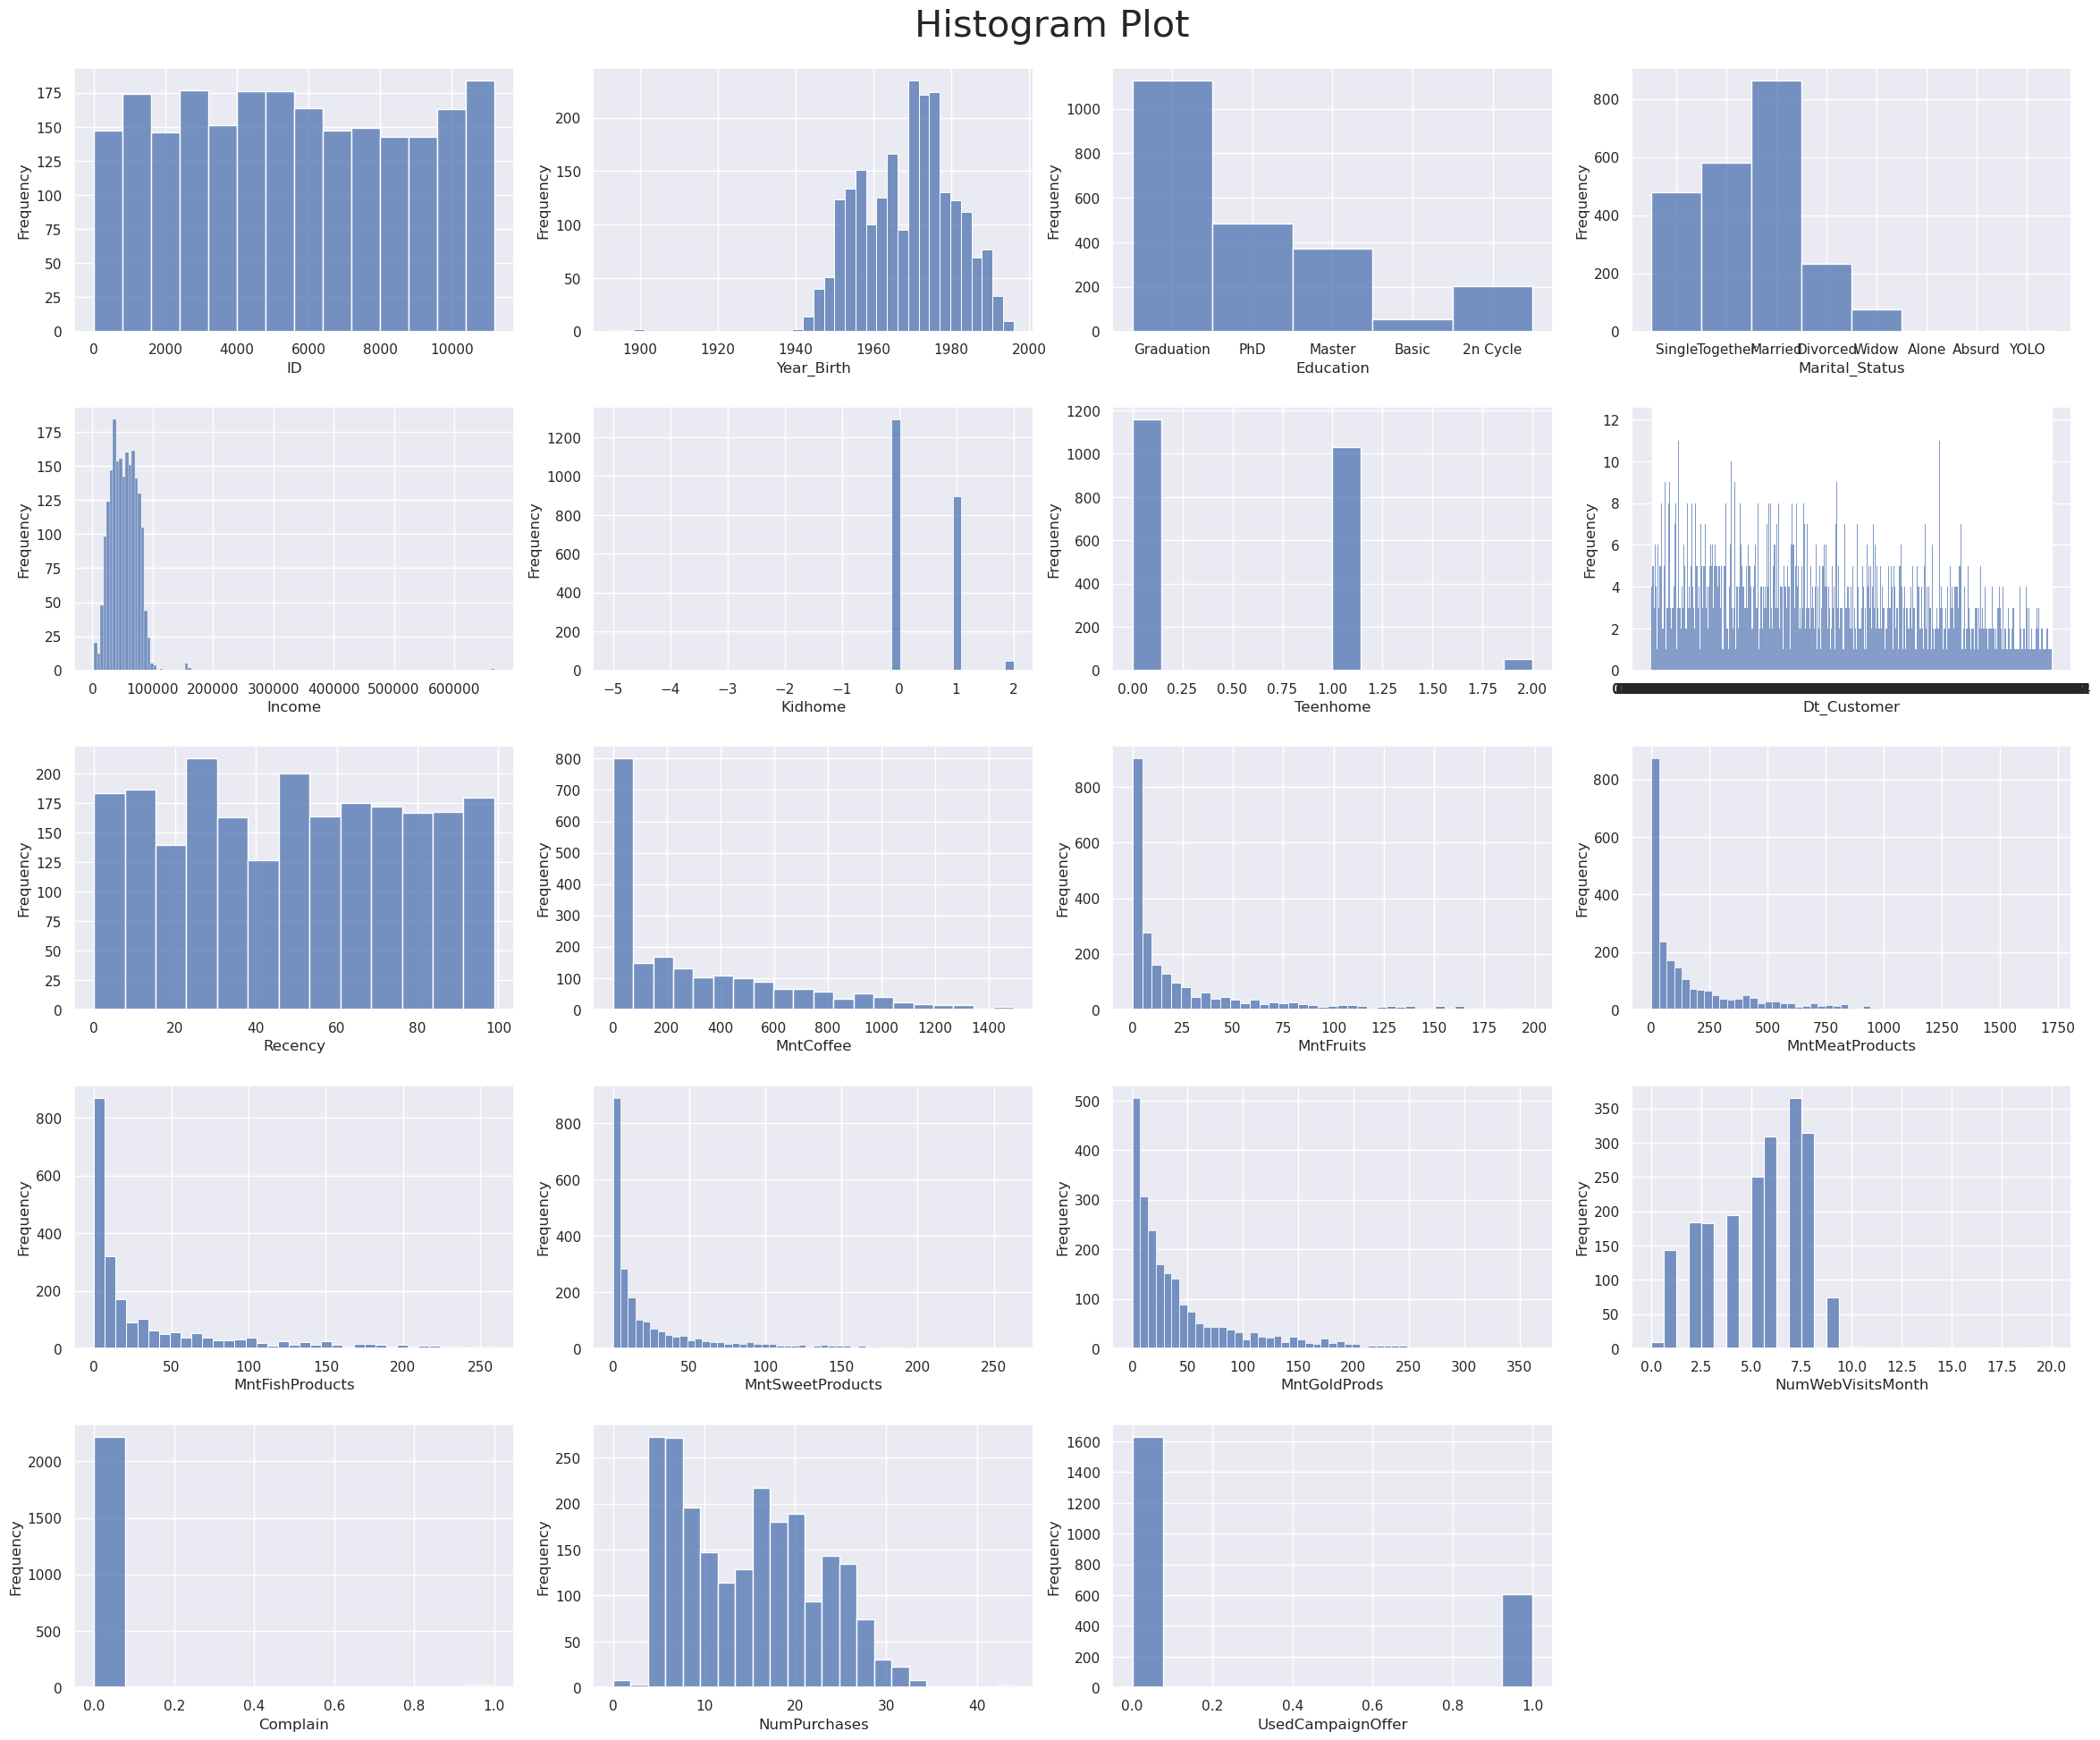

In [4]:
plt.figure(figsize=(24, 20))
for i, col in zip(range(len(df.columns)), df.columns):
    plt.subplot(5, 4, i+1)
    # plt.hist(df[col], bins=15)
    sns.histplot(df[col]);
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histogram Plot', fontsize=30)
plt.tight_layout(w_pad=0, pad=2)
plt.savefig('../assets/Q9_hist.png', dpi=200)
plt.show()

### Scatter Plot

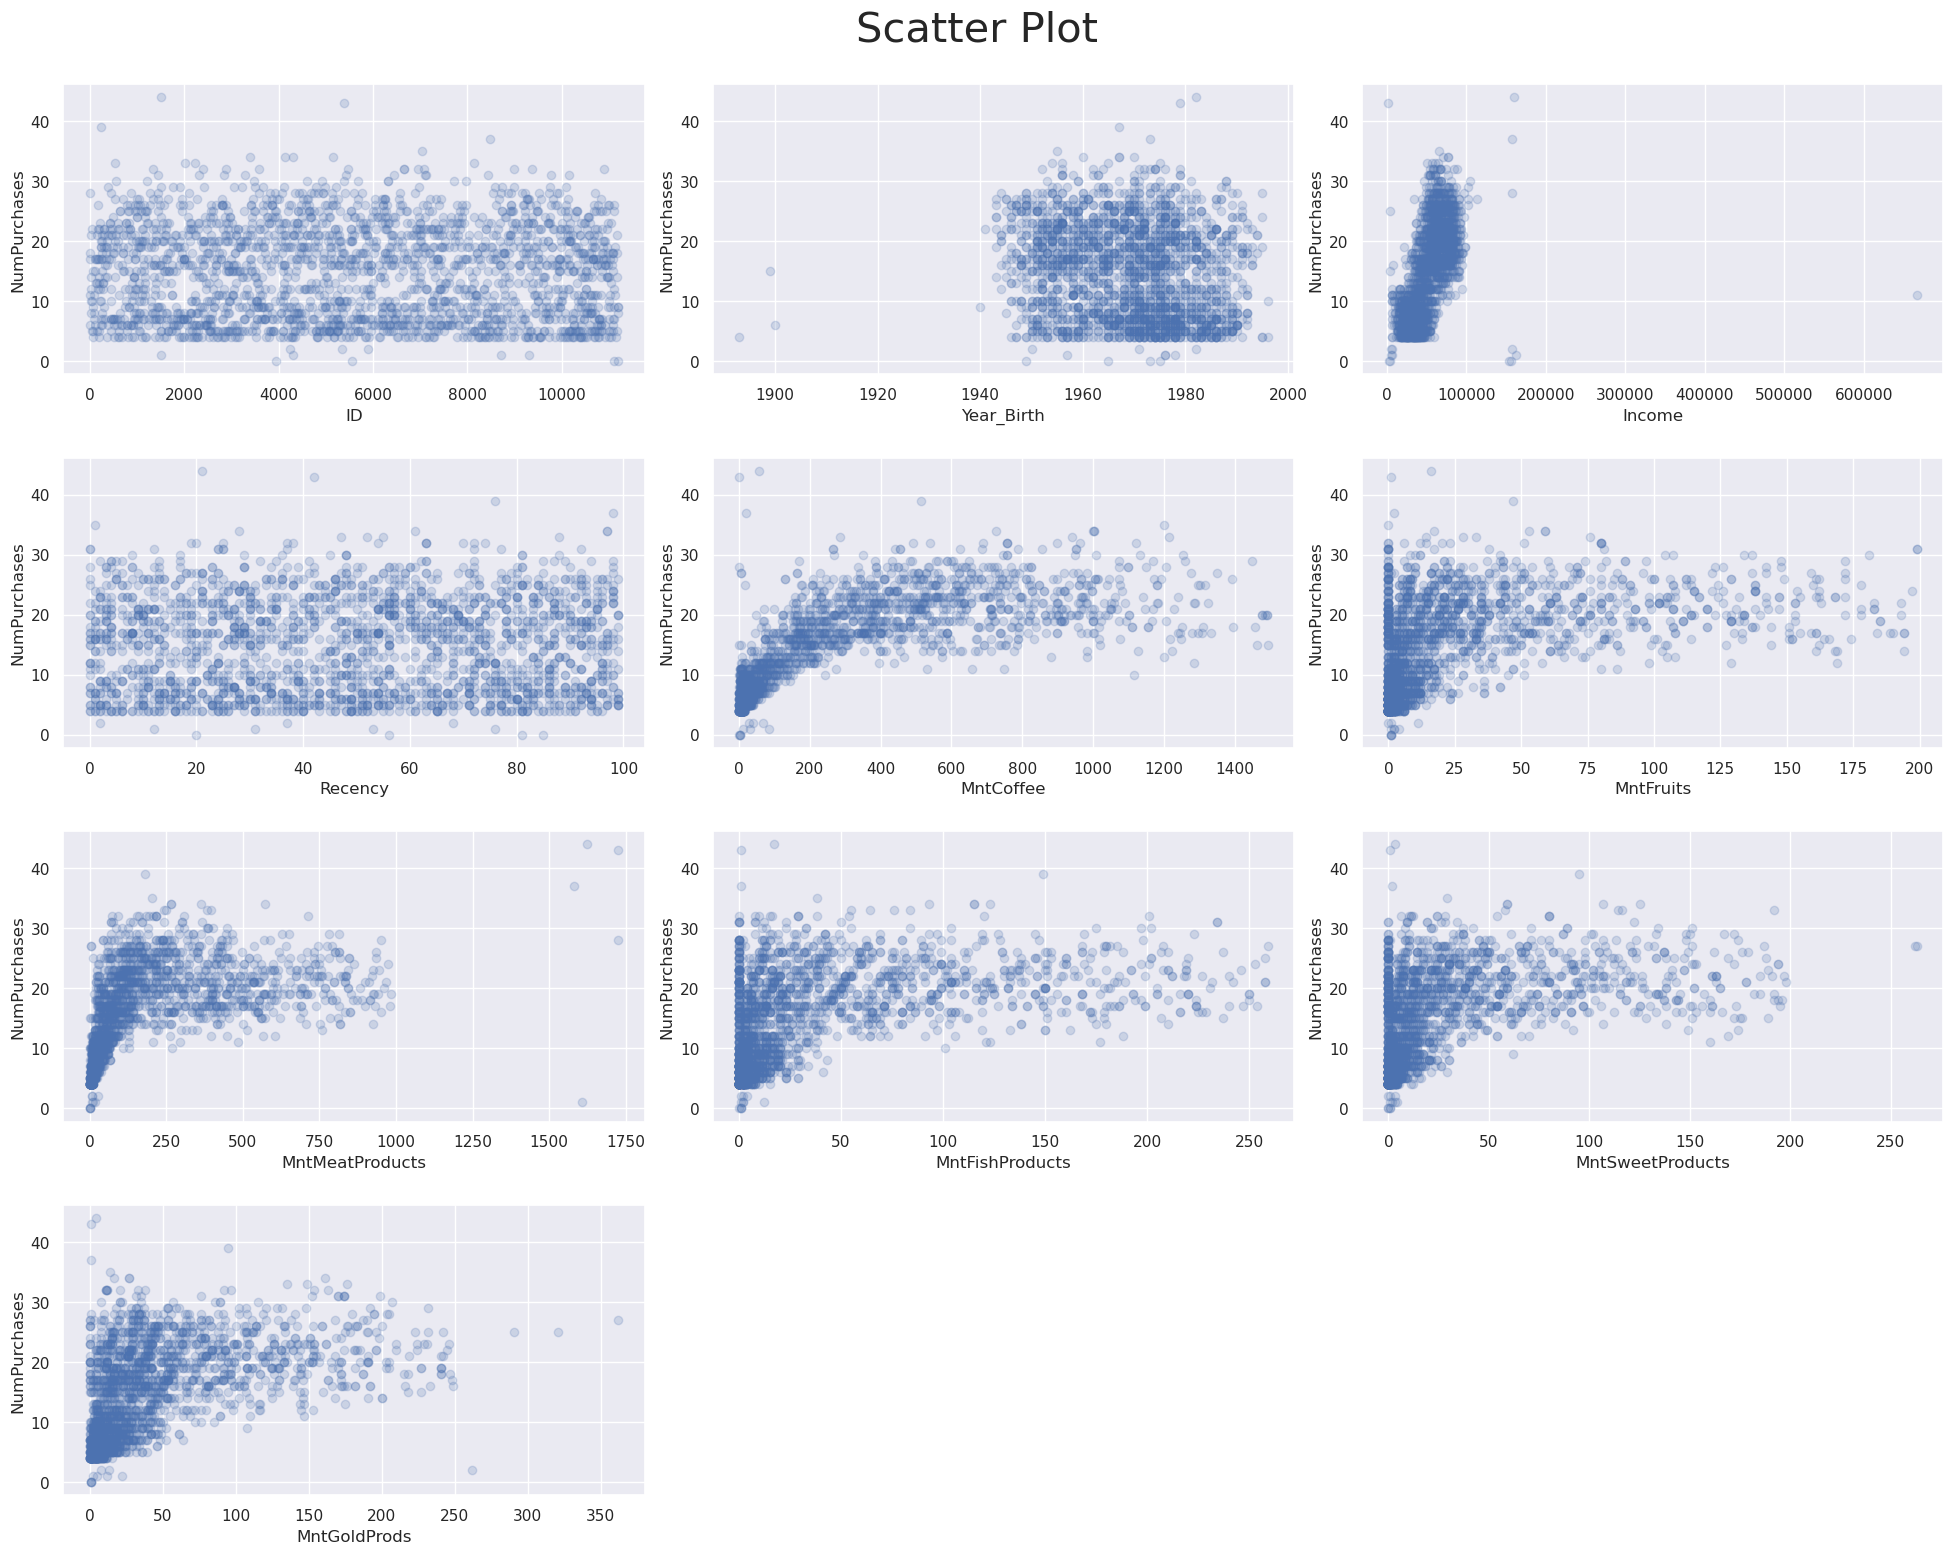

In [5]:
numerical_cols = X.select_dtypes([int, float]).columns
non_categorical_cols = numerical_cols[X[numerical_cols].nunique() > 15]

plt.figure(figsize=(20, 16))
for i, col in zip(range(len(non_categorical_cols)), non_categorical_cols):
    plt.subplot(4, 3, i+1)
    plt.scatter(df[col], df[target], alpha=0.2)
    plt.ylabel(target)
    plt.xlabel(col)

plt.suptitle('Scatter Plot', fontsize=30)
plt.tight_layout(w_pad=0, pad=2)
plt.savefig('../assets/Q9_scatter.png', dpi=200)
plt.show()

### Correlation Matrix

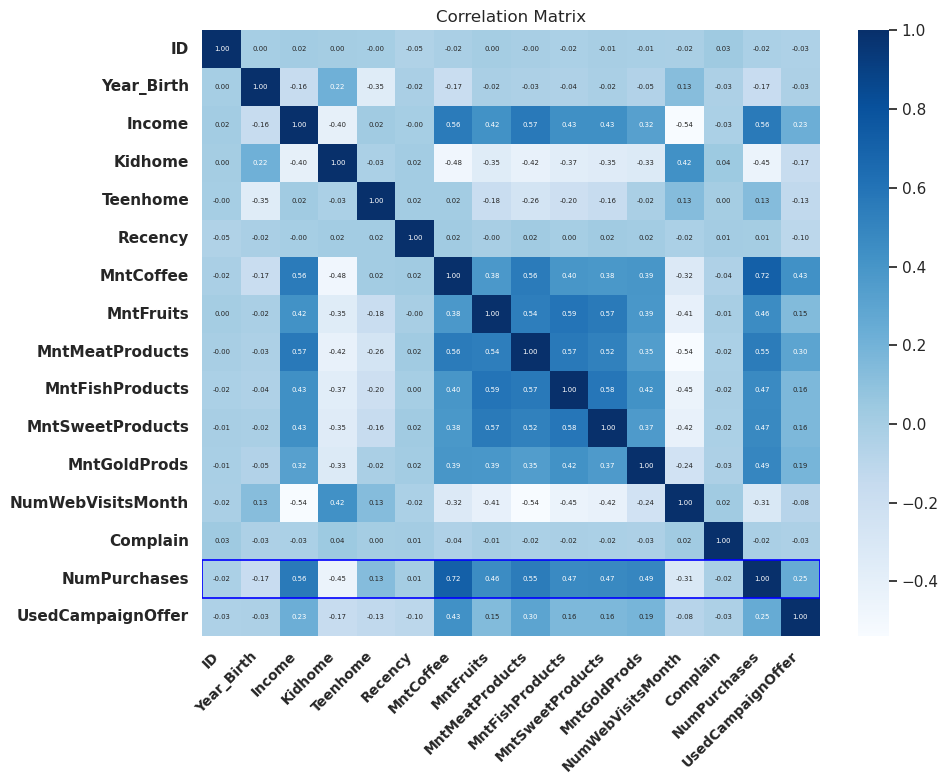

In [6]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='Blues', fmt=".2f", annot=True, annot_kws={"fontsize": 5})
plt.title('Correlation Matrix')
plt.xticks(fontsize=10, rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

target_row_index = 14
rectangle = plt.Rectangle((0, target_row_index), correlation_matrix.shape[1], 1, edgecolor='blue', facecolor='none', lw=1.2)
plt.gca().add_patch(rectangle)

plt.tight_layout(w_pad=2)
plt.savefig('../assets/Q9_correlation.png', dpi=200)
plt.show()

In [7]:
# Highest correlation
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

top_features = sorted_correlations.index[:5]
print("Top features with the highest correlation to the target feature:")
print()
print(f"{'Column': <18} {'Correlation': <20}")
print(f"{'------': <18} {'-----------': <20}")
for feature in top_features:
    print(f"{feature: <{18}} {correlation_matrix.loc[(target, feature)]:.2f}")

Top features with the highest correlation to the target feature:

Column             Correlation         
------             -----------         
MntCoffee          0.72
Income             0.56
MntMeatProducts    0.55
MntGoldProds       0.49
MntSweetProducts   0.47


## Preprocessing and Normalization 
### Handling Missing Value

In [8]:
# FillNa
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

### Handling Non-numerical Features

In [9]:
df['Education'].replace({'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD':5}, inplace=True)

In [10]:
one_hot_encoded = pd.get_dummies(df[['Marital_Status']]).replace({True: 1, False: 0})
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('Marital_Status', axis=1, inplace=True)


In [11]:
from datetime import datetime
for i in range(df.shape[0]):
    date = datetime.strptime(df.loc[(i, 'Dt_Customer')], "%d-%m-%Y")
    curr_date = datetime(2023, 1, 1)
    df.loc[(i, 'Dt_Customer')] = (curr_date - date).days
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,...,NumPurchases,UsedCampaignOffer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,3,58138.0,0,0,3771,58,635.0,88,...,25,1,0,0,0,0,1,0,0,0
1,2174,1954,3,46344.0,1,1,3221,38,177.0,1,...,6,0,0,0,0,0,1,0,0,0
2,4141,1965,3,71613.0,0,0,3420,26,177.0,49,...,21,0,0,0,0,0,0,1,0,0
3,6182,1984,3,26646.0,1,0,3247,26,11.0,4,...,8,0,0,0,0,0,0,1,0,0
4,5324,1981,5,58293.0,1,0,3269,94,173.0,43,...,19,0,0,0,0,1,0,0,0,0


### Normalization

In [12]:
def normalize(df):
    for feature in df.select_dtypes([int, float]).columns:
        df.loc[:, feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

In [13]:
X = df.drop(target, axis=1)
y = df[target]
X = normalize(X)
X.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,...,Complain,UsedCampaignOffer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.020994,-0.985125,-0.458280,0.244780,-0.776960,-0.929687,3771,0.306971,1.057526,1.551231,...,-0.09726,1.636143,-0.029887,-0.036613,-0.339833,-0.792229,1.914427,-0.590967,-0.188634,-0.029887
1,-1.052823,-1.235457,-0.458280,-0.241784,0.997139,0.906732,3221,-0.383579,-0.357016,-0.636159,...,-0.09726,-0.610921,-0.029887,-0.036613,-0.339833,-0.792229,1.914427,-0.590967,-0.188634,-0.029887
2,-0.446970,-0.317572,-0.458280,0.800695,-0.776960,-0.929687,3420,-0.797908,-0.357016,0.570677,...,-0.09726,-0.610921,-0.029887,-0.036613,-0.339833,-0.792229,-0.522116,1.691387,-0.188634,-0.029887
3,0.181676,1.267866,-0.458280,-1.054431,0.997139,-0.929687,3247,-0.797908,-0.869710,-0.560732,...,-0.09726,-0.610921,-0.029887,-0.036613,-0.339833,-0.792229,-0.522116,1.691387,-0.188634,-0.029887
4,-0.082596,1.017534,1.533083,0.251175,0.997139,-0.929687,3269,1.549959,-0.369370,0.419822,...,-0.09726,-0.610921,-0.029887,-0.036613,-0.339833,1.261698,-0.522116,-0.590967,-0.188634,-0.029887


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling
### Simple Linear Regression

In [15]:
class SimpleLinearRegression:
    def __init__(self) -> None:
        self.slope = 0
        self.bias = 0

    def fit(self, x, y):
        cov_matrix = np.cov(x, y)
        self.slope = cov_matrix[0, 1] / cov_matrix[0, 0]
        self.bias = np.mean(y) - self.slope * np.mean(x)

    def predict(self, x):
        return self.slope * x + self.bias


def squared_norm(x):
    return np.power(np.linalg.norm(x), 2) 

def root_mean_square_error(y_true, y_pred):
    mean_square = np.mean(np.power(y_pred - y_true, 2))
    return np.sqrt(mean_square)

def r2_score(y_true, y_pred):
    return np.abs(1 - (squared_norm(y_true - y_pred) / squared_norm(y_true - np.mean(y_true))))

#### Train and Test

In [16]:

print(f"{'#': <3} {'Feature': <24} {'RMSE': <6} {'R2 Score'}")
print(f"{'---'  } {'------': <24} {'----': <6} {'--------'}")

for i, feature in zip(range(len(X)), X.select_dtypes([int, float]).columns):
    x = X_train[feature].to_numpy()
    model = SimpleLinearRegression()
    model.fit(x, y_train.to_numpy())
    y_pred = model.predict(X_test[feature].to_numpy())
    rmse = root_mean_square_error(y_test.to_numpy(), y_pred)
    r2score = r2_score(y_test.to_numpy(), y_pred)
    print(f"{i:<4}{feature: <24}{rmse: .2f}     {r2score:.2f}")

#   Feature                  RMSE   R2 Score
--- ------                   ----   --------
0   ID                       7.55     0.01
1   Year_Birth               7.55     0.01
2   Education                7.46     0.01
3   Income                   6.15     0.33
4   Kidhome                  6.94     0.15
5   Teenhome                 7.52     0.00
6   Recency                  7.55     0.01
7   MntCoffee                5.48     0.47
8   MntFruits                6.99     0.14
9   MntMeatProducts          6.37     0.28
10  MntFishProducts          7.03     0.13
11  MntSweetProducts         6.82     0.18
12  MntGoldProds             6.75     0.19
13  NumWebVisitsMonth        7.33     0.05
14  Complain                 7.55     0.01
15  UsedCampaignOffer        7.34     0.05
16  Marital_Status_Absurd    7.55     0.01
17  Marital_Status_Alone     7.55     0.01
18  Marital_Status_Divorced  7.55     0.01
19  Marital_Status_Married   7.55     0.01
20  Marital_Status_Single    7.54     0.01
21  Mar

### Multiple Regression

In [17]:
class MultipleRegression:
    def __init__(self, learning_rate=1.e-4, tolerance=1.e-10, initial_weights=None) -> None:
        self.weights = initial_weights
        self.learning_rate = learning_rate
        self.tolerance = tolerance

    def predict(self, X):
        if X.shape[1] < len(self.weights):
            X = np.insert(X, 0, 1, axis=1)
        return np.matmul(X, self.weights)
    
    def fit(self, X, true_y):
        X = np.insert(X, 0, 1, axis=1)
        if self.weights == None:
            self.weights = np.ones(X.shape[1]) / 2

        gradient_length = np.inf
        while gradient_length > self.tolerance:

            errors = self.predict(X) - true_y 
            gradient = self._gradient(X, errors)
            self.weights -= self.learning_rate * gradient

            gradient_length = np.linalg.norm(gradient)

    def _gradient(self, X, errors):
        return np.sum(X * errors.reshape(-1, 1), axis=0) / len(X)


#### Train and Test

In [18]:
selected_features = ['MntCoffee', 'Income', 'MntMeatProducts']
X = X_train.loc[:, selected_features]

model = MultipleRegression()
model.fit(X.to_numpy(), y_train.to_numpy())
x_t = X_test.loc[:, selected_features]
y_pred = model.predict(x_t)

print(f"RMSE:     {root_mean_square_error(y_test.to_numpy(), y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test.to_numpy(), y_pred):.2f}")

RMSE:     5.16
R2 Score: 0.53
